<a href="https://colab.research.google.com/github/jjhiatt/Capstone-II-Josh-Hiatt/blob/main/Capstone_2_US_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORTING: Importing Modules
!pip install ydata_profiling
from ydata_profiling import ProfileReport
!pip install opendatasets
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns


In [ ]:
#IMPORTING DATA: Kaggle username and key.
 #{"username":"joshuahiatt","key":"0e0d379008f0bf32b03c49a253c03b4a"}

In [210]:
#Downloading Kaggle dataset and storing it to a directory.
od.download(
    "https://www.kaggle.com/datasets/cid007/pizza-restaurants-us", force=True
)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: joshuahiatt
Your Kaggle Key: ··········


100%|██████████| 395k/395k [00:00<00:00, 69.5MB/s]

In [211]:
#Accessing the CSV file.
pizza_directory = ('./pizza-restaurants-us/Pizza_Restaurants_and_the_Pizza_They_Sell.csv')

In [212]:
#Reading the CSV File and storing in a dataframe.
pizza = pd.read_csv(pizza_directory)

In [213]:
pizza.head()

,id,address,categories,primaryCategories,city,country,keys,latitude,longitude,menuPageURL,menus.amountMax,menus.amountMin,menus.description,menus.name,name,postalCode,priceRangeMin,priceRangeMax,province
0,AVz3Y-7h3D1zeR_xDAqm,4203 E Kiehl Ave,"Pizza,Restaurant,American restaurants,Pizza Pl...",Accommodation & Food Services,Sherwood,US,us/ar/sherwood/4203ekiehlave/-1051391616,34.832300,-92.183800,http://www.citysearch.com/profile/menu/1550074...,7.98,7.98,NaN,Cheese Pizza,Shotgun Dans Pizza,72120,0,25,AR
1,AVweGPFF_7pvs4fzAAzQ,25 E Camelback Rd,"Pizza,Pizza Place,Restaurants",Accommodation & Food Services,Phoenix,US,us/az/phoenix/25ecamelbackrd/-727422936,33.509266,-112.073044,NaN,6.00,6.00,NaN,Pizza Cookie,Sauce Pizza Wine,85012,0,25,AZ
2,AVwdRGa9_7pvs4fz4E3K,3703 Paxton Ave,"Restaurant,Pizza Place,Restaurants",Accommodation & Food Services,Cincinnati,US,us/oh/cincinnati/3703paxtonave/-619797122,39.144883,-84.432685,http://www.citysearch.com/profile/menu/8160503...,6.49,6.49,a saucelessampcomma double cheese pizza with a...,Pizza Blanca,Mios Pizzeria,45209,0,25,OH
3,AVwdX4psIN2L1WUfvJB1,30495 John R Rd,"Pizza,Carry-out food,Pizza Place,Restaurants",Accommodation & Food Services,Madison Heights,US,us/mi/madisonheights/30495johnrrd/-874863116,42.516669,-83.106630,NaN,5.99,5.99,NaN,Small Pizza,Hungry Howies Pizza,48071,25,40,MI
4,AVwdaeTtkufWRAb55pSH,3600 Eastern Ave,"Pizza,American restaurants,Pizza Place,Pizza e...",Accommodation & Food Services,Baltimore,US,us/md/baltimore/3600easternave/-1270965359,39.286630,-76.566984,NaN,5.49,5.49,NaN,Pizza Sub,Spartan Pizzeria,21224,0,25,MD


In [214]:
#Makeing all string objects lower case.
for col in pizza:
  if pizza[col].dtype == 'object':
    pizza[col] = pizza[col].str.lower()

In [215]:
#DATATYPES: Checking the data types of the pizza dataframe.
pizza.dtypes

id                    object
address               object
categories            object
primaryCategories     object
city                  object
country               object
keys                  object
latitude             float64
longitude            float64
menuPageURL           object
menus.amountMax      float64
menus.amountMin      float64
menus.description     object
menus.name            object
name                  object
postalCode            object
priceRangeMin          int64
priceRangeMax          int64
province              object
dtype: object

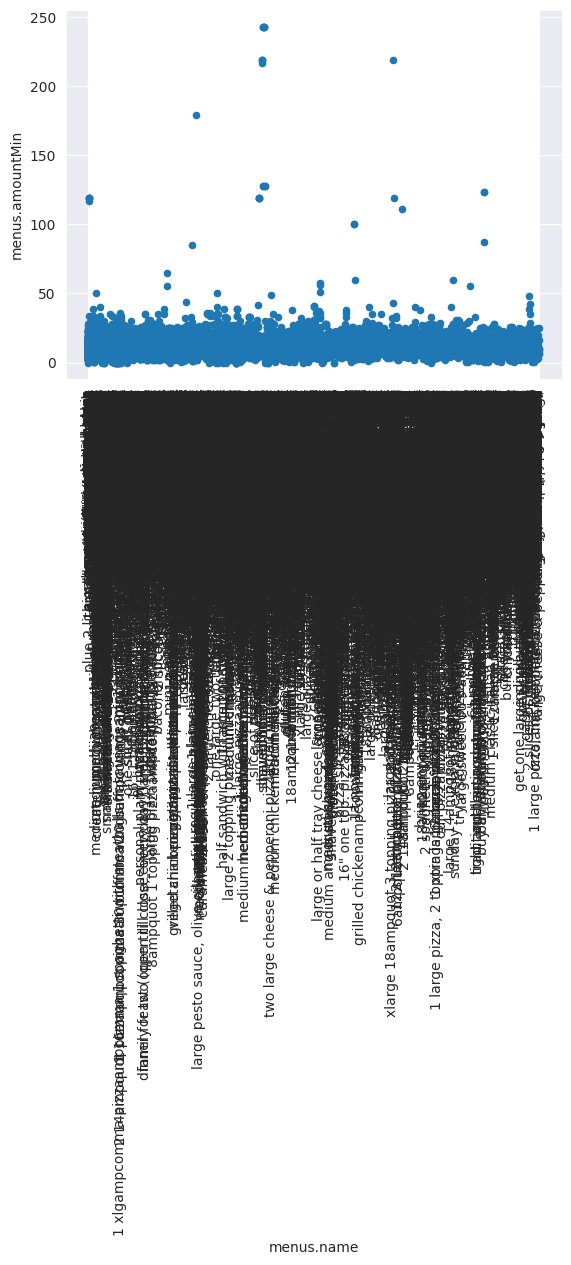

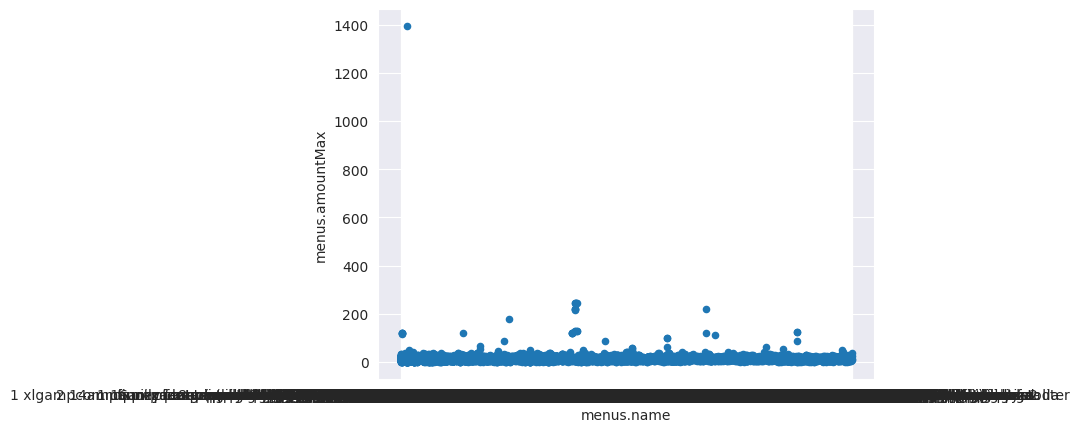

In [ ]:
#RANGES: Look at scatterplot of menus.amountMin and menus.amountMax to determine if there are any outliers.
pizza.plot(x='menus.name', y='menus.amountMin', kind='scatter')
plt.xticks(rotation=90)
pizza.plot(x='menus.name', y='menus.amountMax', kind='scatter')
plt.show()

In [216]:
#Going to filter out any menu items from the data fram that are over $50 as that is where the majority of the data exists with few exceptions.
pizza = pizza[pizza['menus.amountMin'] <= 50.00]
pizza = pizza[pizza['menus.amountMax'] <= 50.00]

In [ ]:
#Confirming dataframe has been filtered to $50.00 or below price points.
pizza.plot(x='menus.name', y='menus.amountMin', kind='scatter')
pizza.plot(x='menus.name', y='menus.amountMax', kind='scatter')

In [217]:
#DUPLICATES: Finding and removing duplicates. No Duplicates found just differing menu items at the same restaurant.
duplicates = pizza.duplicated()
pizza[duplicates]

,id,address,categories,primaryCategories,city,country,keys,latitude,longitude,menuPageURL,menus.amountMax,menus.amountMin,menus.description,menus.name,name,postalCode,priceRangeMin,priceRangeMax,province
104,avwcvcby_7pvs4fzyddm,8381 market st,pizza place,accommodation & food services,youngstown,us,us/oh/youngstown/8381marketst/-697115922,40.996343,-80.662320,NaN,8.99,8.99,NaN,make any pizza a supreme with 5 toppings,bruno bros pizza,44512,0,25,oh
138,avwckj-gkufwrab5wle8,9705 mintworth ave,"italian restaurant,pizza place,italian restaur...",accommodation & food services,charlotte,us,us/nc/charlotte/9705mintworthave/1502696362,35.172024,-80.708379,NaN,13.95,13.95,NaN,new york style pizza with onions,angelas italian restaurant,28227,0,25,nc
166,avweegb3kufwrab5_r4w,1090 montgomery rd,"italian restaurant,pizza place",accommodation & food services,altamonte springs,us,us/fl/altamontesprings/1090montgomeryrd/111408...,28.686584,-81.403849,NaN,7.00,7.00,NaN,personal pizza (per topping),papa joes,32714,0,25,fl
168,avweegb3kufwrab5_r4w,1090 montgomery rd,"italian restaurant,pizza place",accommodation & food services,altamonte springs,us,us/fl/altamontesprings/1090montgomeryrd/111408...,28.686584,-81.403849,NaN,2.00,2.00,NaN,pizza by the slice,papa joes,32714,0,25,fl
353,avwdz7mkbyjofqcxoxec,1004 kings hwy,pizza place,accommodation & food services,lewes,us,us/de/lewes/1004kingshwy/1388074784,38.760778,-75.145791,NaN,12.50,12.50,NaN,pizza of the month,mr ps pizza,19958,0,25,de
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9582,avwdpkifin2l1wufx2fg,1552 fm 685,pizza place,accommodation & food services,pflugerville,us,us/tx/pflugerville/1552fm685/1154079290,30.452988,-97.604454,NaN,17.99,17.99,NaN,chicken caesar pizza (white),yaghi's new york pizzeria,78660,0,25,tx
9586,avwdpkifin2l1wufx2fg,1552 fm 685,pizza place,accommodation & food services,pflugerville,us,us/tx/pflugerville/1552fm685/1154079290,30.452988,-97.604454,NaN,17.99,17.99,NaN,fresh5 tomatoes and garlic pizza (white),yaghi's new york pizzeria,78660,0,25,tx
9590,avwdpkifin2l1wufx2fg,1552 fm 685,pizza place,accommodation & food services,pflugerville,us,us/tx/pflugerville/1552fm685/1154079290,30.452988,-97.604454,NaN,17.99,17.99,NaN,hawaiian pizza (white),yaghi's new york pizzeria,78660,0,25,tx
9892,avwdk0eb_7pvs4fz2-lz,2313 e venango st,pizza place,accommodation & food services,philadelphia,us,us/pa/philadelphia/2313evenangost/1737226038,39.994090,-75.097180,NaN,2.25,2.25,NaN,pizza by the slice,santucci's square pizza v,19134,0,25,pa


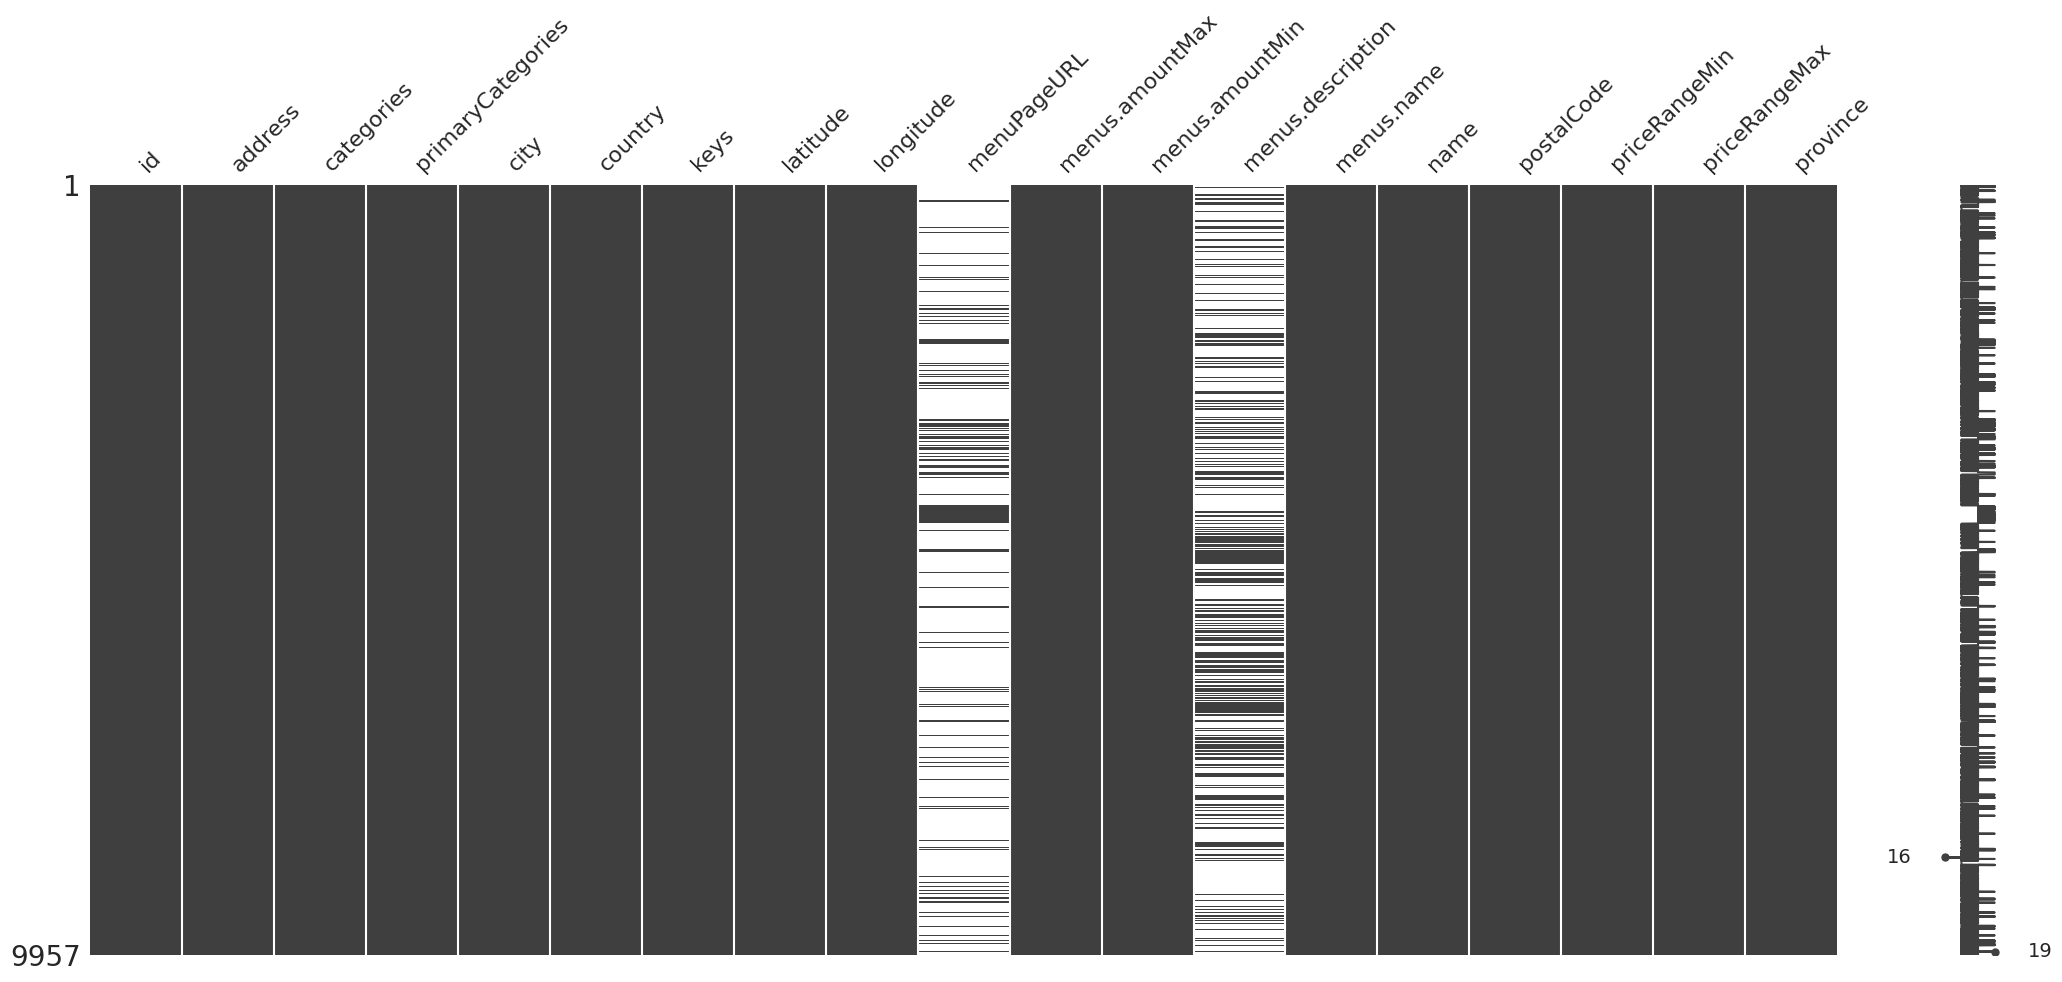

In [218]:
#COMPLETENESS: Visualizing Missing data from dataframe. Lot of missing data in two columns that can be dropped.
msno.matrix(pizza)
plt.show()

In [219]:
#Delete Columns with many missing data entries and unused columns
pizza_cleansed = pizza.drop(columns=['menuPageURL', 'menus.description', 'id', 'categories', 'primaryCategories', 'keys'])

In [220]:
pizza_cleansed.head()

,address,city,country,latitude,longitude,menus.amountMax,menus.amountMin,menus.name,name,postalCode,priceRangeMin,priceRangeMax,province
0,4203 e kiehl ave,sherwood,us,34.832300,-92.183800,7.98,7.98,cheese pizza,shotgun dans pizza,72120,0,25,ar
1,25 e camelback rd,phoenix,us,33.509266,-112.073044,6.00,6.00,pizza cookie,sauce pizza wine,85012,0,25,az
2,3703 paxton ave,cincinnati,us,39.144883,-84.432685,6.49,6.49,pizza blanca,mios pizzeria,45209,0,25,oh
3,30495 john r rd,madison heights,us,42.516669,-83.106630,5.99,5.99,small pizza,hungry howies pizza,48071,25,40,mi
4,3600 eastern ave,baltimore,us,39.286630,-76.566984,5.49,5.49,pizza sub,spartan pizzeria,21224,0,25,md


In [221]:
#Rename columns for correct syntax.
pizza_cleansed.rename(columns={'menus.name':'menu_item', 'menus.amountMax':'menus_amountMax', 'menus.amountMin':'menus_amountMin', 'province':'state_code'}, inplace=True)

In [222]:
#Removing special characters from 'menu_item'.
pizza_cleansed['menu_item'] = pizza_cleansed['menu_item'].str.split('.').str.get(0)
pizza_cleansed['menu_item'] = pizza_cleansed['menu_item'].str.split('!').str.get(0)
pizza_cleansed['menu_item'] = pizza_cleansed['menu_item'].str.split('(').str.get(0)
pizza_cleansed['menu_item'] = pizza_cleansed['menu_item'].str.split(')').str.get(0)
pizza_cleansed['menu_item'] = pizza_cleansed['menu_item'].str.split('"').str.get(0)

In [223]:
#Remove apostraphe from restuarant name.
pizza_cleansed['name'] = pizza_cleansed['name'].str.replace("'", "")

In [224]:
#IMPORTING DATA: Importing US City Demograghic data.
import requests

In [225]:
url = "https://public.opendatasoft.com/api/records/1.0/search/?dataset=us-cities-demographics&rows=10000"  # increased rows to fetch more data

In [226]:
response = requests.get(url)
data = response.json()

In [227]:
records = data['records']

In [228]:
table_data = [record['fields'] for record in records]

In [229]:
US_Cities = pd.DataFrame(table_data)

In [230]:
US_Cities.head()

,total_population,female_population,count,foreign_born,state_code,average_household_size,city,race,male_population,median_age,number_of_veterans,state
0,281913,143873.0,76402,86253.0,NJ,2.73,Newark,White,138040.0,34.6,5829.0,New Jersey
1,118661,62432.0,1343,7517.0,IL,2.40,Peoria,American Indian and Alaska Native,56229.0,33.1,6634.0,Illinois
2,85032,43270.0,2583,3269.0,MO,2.77,O'Fallon,Hispanic or Latino,41762.0,36.0,5783.0,Missouri
3,136454,70240.0,70303,6204.0,VA,2.48,Hampton,Black or African-American,66214.0,35.5,19638.0,Virginia
4,152589,76576.0,33630,14169.0,CO,2.29,Lakewood,Hispanic or Latino,76013.0,37.7,9988.0,Colorado


In [231]:
#Dropping race and count columns as they create duplicate information.
US_Cities = US_Cities.drop(columns=['race','count'])

In [232]:
#DUPLICATES: Finding and removing duplicates. No Duplicates found.
duplicates2 = US_Cities.duplicated()
US_Cities[duplicates2]

,total_population,female_population,foreign_born,state_code,average_household_size,city,male_population,median_age,number_of_veterans,state
16,82106,40345.0,12014.0,TX,2.55,Bryan,41761.0,29.4,3602.0,Texas
21,108807,56572.0,19967.0,CT,2.71,Waterbury,52235.0,36.2,3493.0,Connecticut
39,67536,35364.0,1699.0,AL,2.59,Dothan,32172.0,38.9,6334.0,Alabama
93,72856,38210.0,1224.0,IL,2.23,Decatur,34646.0,40.4,5291.0,Illinois
109,95314,49041.0,27313.0,MA,2.88,Brockton,46273.0,35.2,3036.0,Massachusetts
...,...,...,...,...,...,...,...,...,...,...
2886,121269,62890.0,30592.0,CA,2.83,Vallejo,58379.0,37.8,8103.0,California
2887,864816,425064.0,297199.0,CA,2.37,San Francisco,439752.0,38.3,26276.0,California
2888,69701,37255.0,1062.0,IN,2.35,Muncie,32446.0,27.4,2968.0,Indiana
2889,145124,75884.0,26755.0,TX,2.96,Mesquite,69240.0,34.6,6438.0,Texas


In [233]:
US_Cities_cleansed = US_Cities.drop_duplicates(subset=['city', 'state_code', 'total_population'])

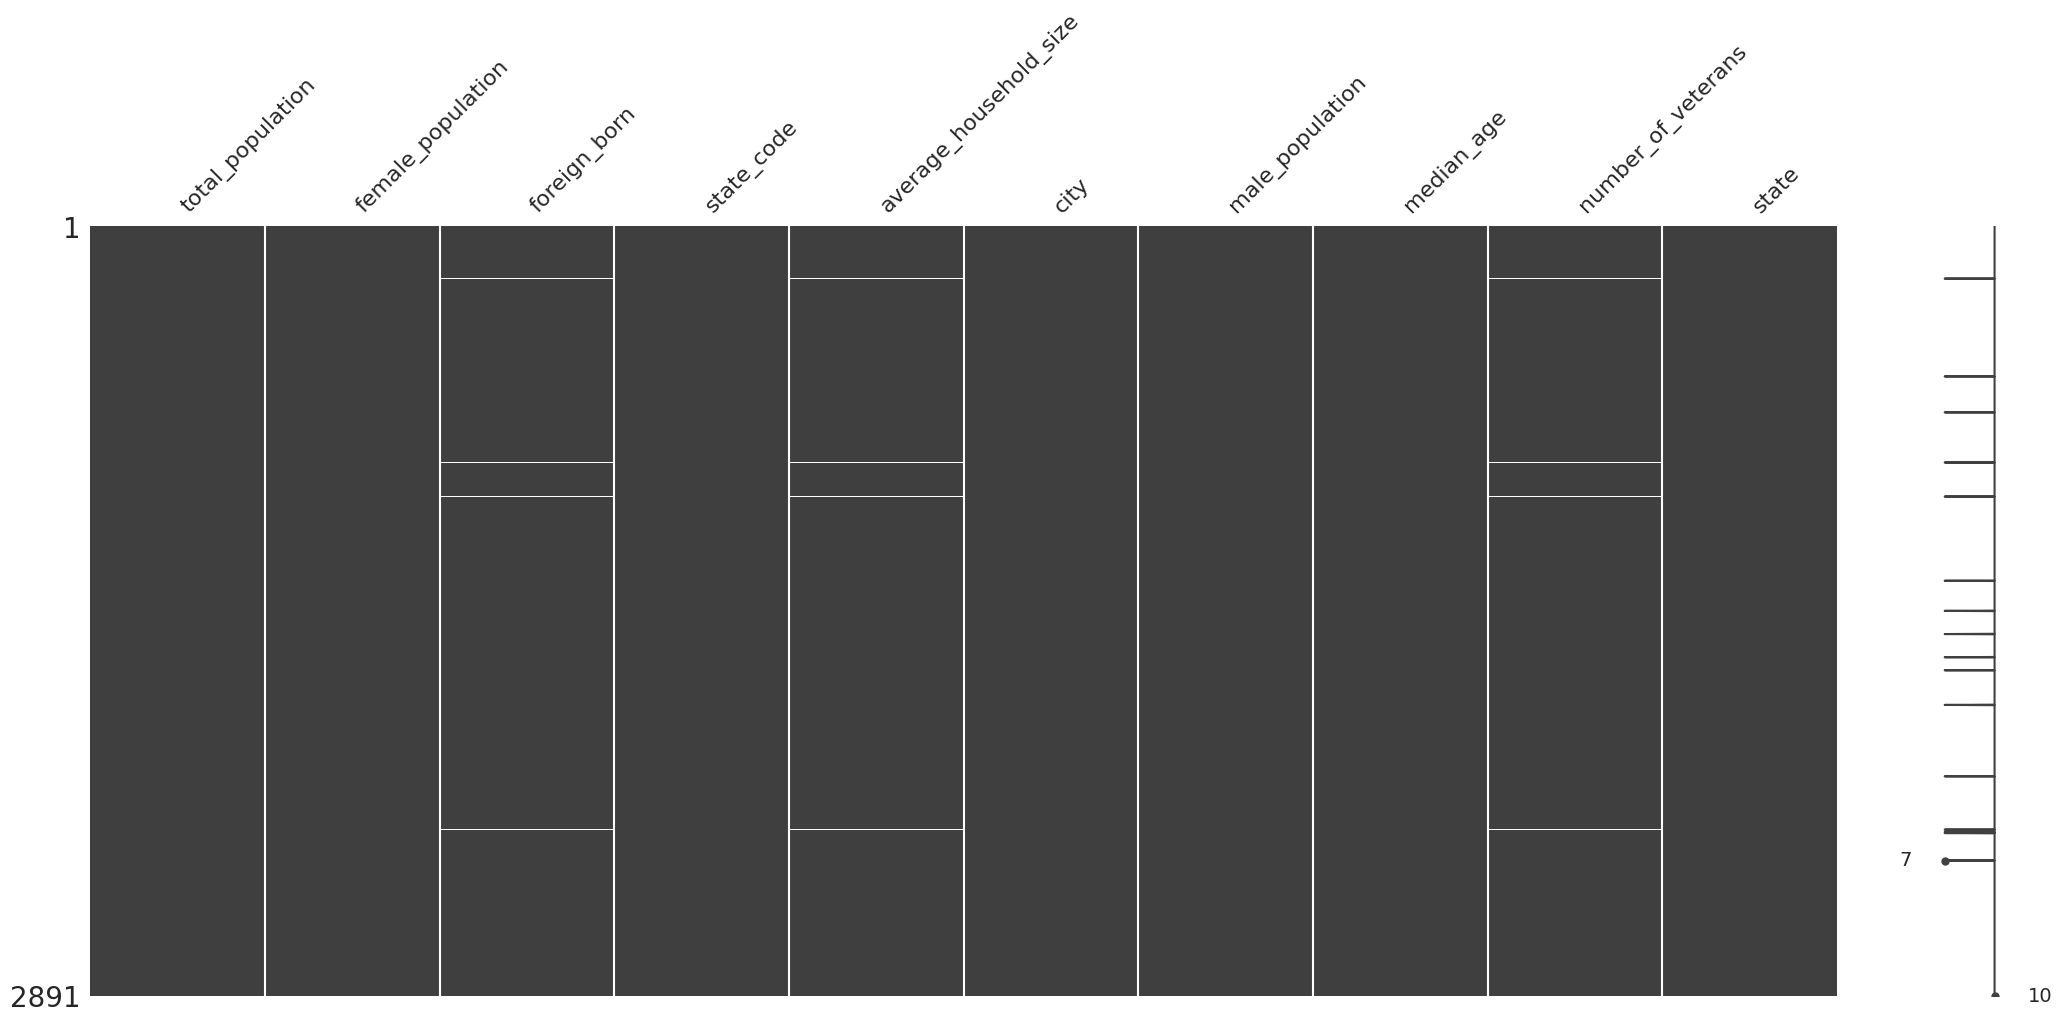

In [234]:
#COMPLETENESS: Visualizing Missing data from dataframe.
msno.matrix(US_Cities)
plt.show()

In [235]:
US_Cities_cleansed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596 entries, 0 to 2353
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_population        596 non-null    int64  
 1   female_population       595 non-null    float64
 2   foreign_born            589 non-null    float64
 3   state_code              596 non-null    object 
 4   average_household_size  588 non-null    float64
 5   city                    596 non-null    object 
 6   male_population         595 non-null    float64
 7   median_age              596 non-null    float64
 8   number_of_veterans      589 non-null    float64
 9   state                   596 non-null    object 
dtypes: float64(6), int64(1), object(3)
memory usage: 51.2+ KB


In [236]:
#Makeing all string objects lower case.
for col in US_Cities_cleansed:
  if US_Cities_cleansed[col].dtype == 'object':
    US_Cities_cleansed[col] = US_Cities[col].str.lower()

<ipython-input-236-6faedd6697e2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_Cities_cleansed[col] = US_Cities[col].str.lower()


In [237]:
#MERGING: Joining the pizza_cleansed dataframe with the CO_Cities_Cleansed dataframe.
US_Pizza_Cities = pizza_cleansed.merge(US_Cities_cleansed, on=['city', 'state_code'], how='inner')

In [238]:
US_Pizza_Cities.head()

,address,city,country,latitude,longitude,menus_amountMax,menus_amountMin,menu_item,name,postalCode,...,priceRangeMax,state_code,total_population,female_population,foreign_born,average_household_size,male_population,median_age,number_of_veterans,state
0,25 e camelback rd,phoenix,us,33.509266,-112.073044,6.00,6.00,pizza cookie,sauce pizza wine,85012,...,25,az,1563001,776168.0,300702.0,2.89,786833.0,33.8,72388.0,arizona
1,3414 w union hills dr,phoenix,us,33.654650,-112.132750,5.50,5.50,meatball pizza roll,rays pizza,85027,...,25,az,1563001,776168.0,300702.0,2.89,786833.0,33.8,72388.0,arizona
2,3414 w union hills dr,phoenix,us,33.654650,-112.132750,5.50,5.50,green pepper and onion pizza roll,rays pizza,85027,...,25,az,1563001,776168.0,300702.0,2.89,786833.0,33.8,72388.0,arizona
3,3414 w union hills dr,phoenix,us,33.654650,-112.132750,4.25,4.25,pizza fries with pepperoni or bacon,rays pizza,85027,...,25,az,1563001,776168.0,300702.0,2.89,786833.0,33.8,72388.0,arizona
4,10720 w indian school rd,phoenix,us,33.495299,-112.290831,21.95,21.95,brothers special sicilian pizza,brothers pizza,85037,...,25,az,1563001,776168.0,300702.0,2.89,786833.0,33.8,72388.0,arizona


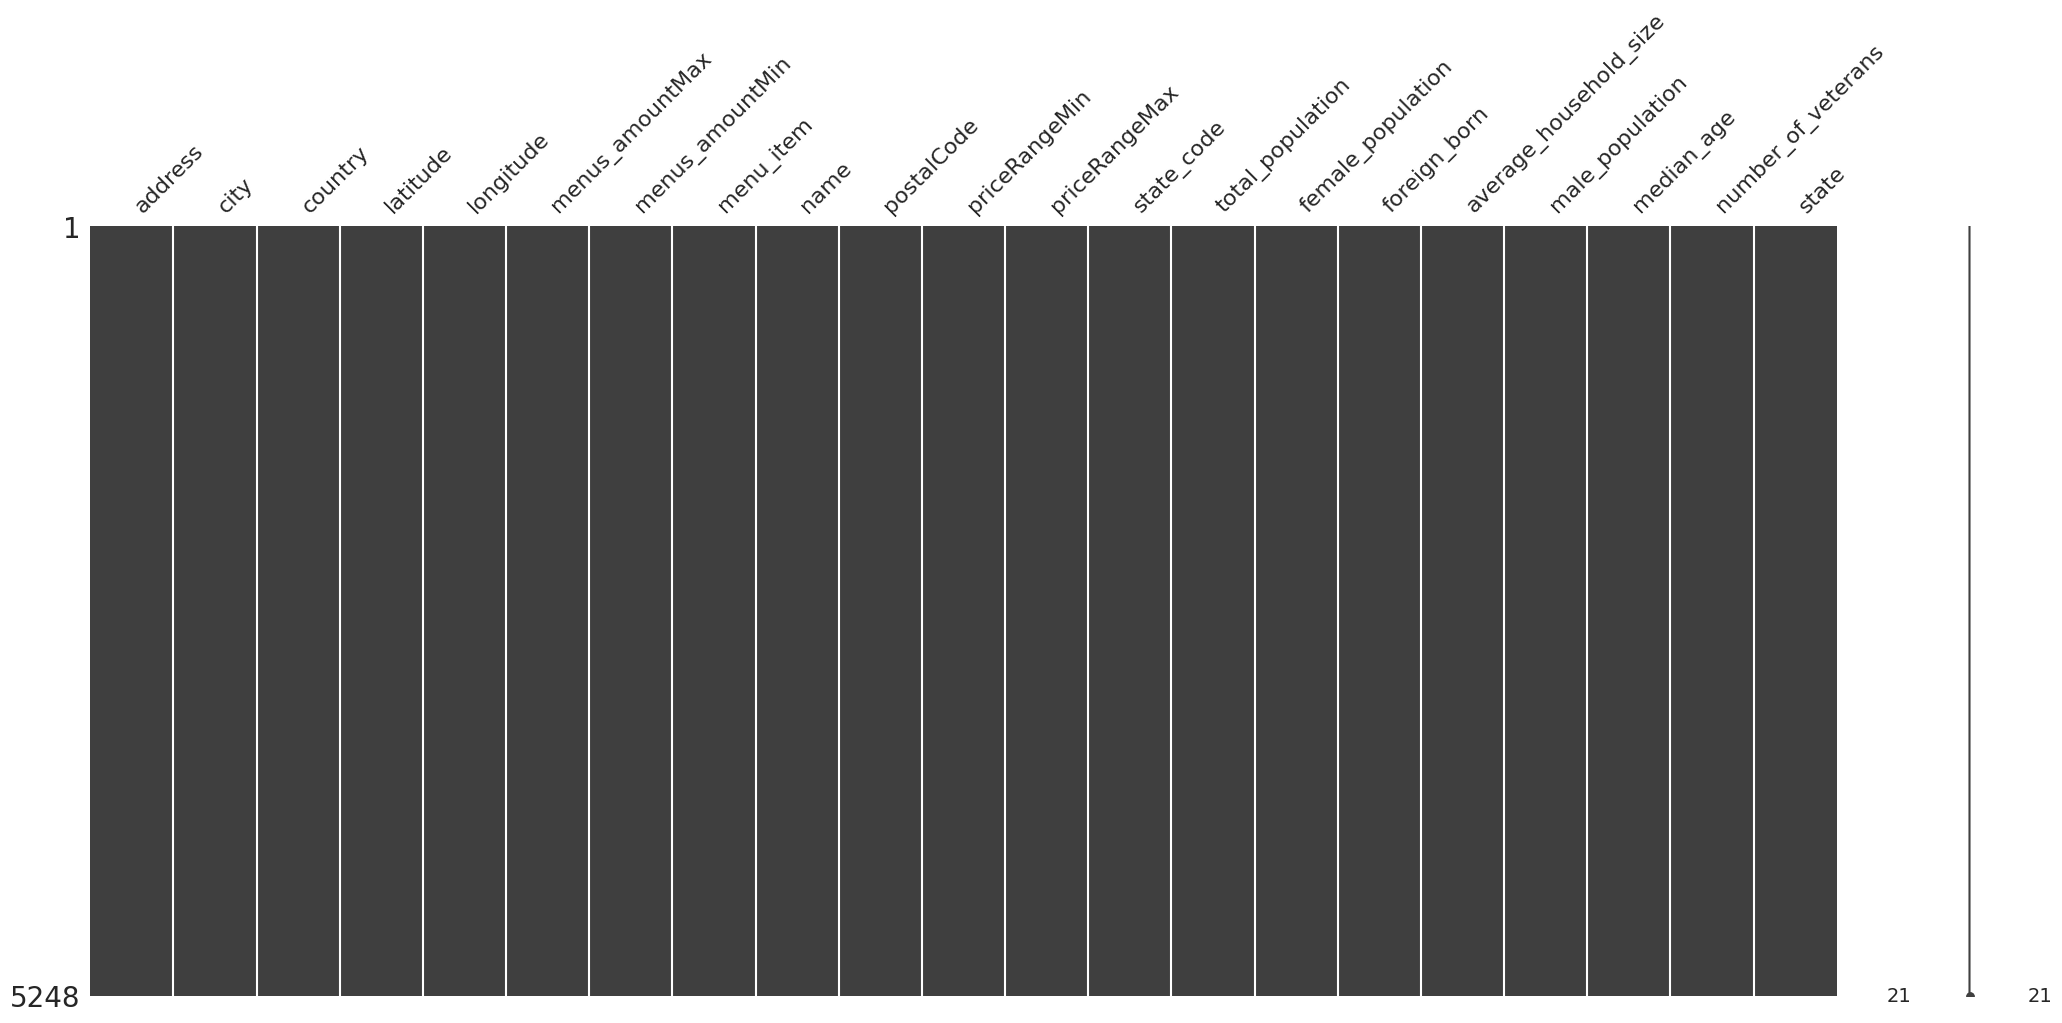

In [239]:
#Completeness of Combined Dataframe.
msno.matrix(US_Pizza_Cities)
plt.show()

In [240]:
US_Pizza_Cities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5248 entries, 0 to 5247
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   address                 5248 non-null   object 
 1   city                    5248 non-null   object 
 2   country                 5248 non-null   object 
 3   latitude                5248 non-null   float64
 4   longitude               5248 non-null   float64
 5   menus_amountMax         5248 non-null   float64
 6   menus_amountMin         5248 non-null   float64
 7   menu_item               5248 non-null   object 
 8   name                    5248 non-null   object 
 9   postalCode              5248 non-null   object 
 10  priceRangeMin           5248 non-null   int64  
 11  priceRangeMax           5248 non-null   int64  
 12  state_code              5248 non-null   object 
 13  total_population        5248 non-null   int64  
 14  female_population       5248 non-null   

In [241]:
US_Pizza_Cities.describe()

,latitude,longitude,menus_amountMax,menus_amountMin,priceRangeMin,priceRangeMax,total_population,female_population,foreign_born,average_household_size,male_population,median_age,number_of_veterans
count,5248.000000,5248.000000,5248.000000,5248.000000,5248.000000,5248.000000,5.248000e+03,5.248000e+03,5.248000e+03,5248.000000,5.248000e+03,5248.000000,5248.000000
mean,37.829959,-94.721237,13.726471,13.230389,5.804878,28.432355,1.633480e+06,8.462989e+05,5.304848e+05,2.574971,7.871815e+05,35.258175,41575.092988
std,4.935677,17.977591,6.762965,6.509323,10.631178,6.592497,2.738847e+06,1.430729e+06,1.051138e+06,0.308670,1.308259e+06,3.556208,49559.263019
min,25.656882,-149.894053,0.000000,0.000000,0.000000,7.000000,6.321500e+04,2.734800e+04,1.062000e+03,2.000000,2.928100e+04,23.500000,1066.000000
25%,33.883979,-115.124244,8.950000,8.500000,0.000000,25.000000,1.605140e+05,8.158200e+04,2.180200e+04,2.370000,7.893200e+04,33.100000,7426.000000
50%,39.231333,-87.693446,13.950000,13.000000,0.000000,25.000000,3.896170e+05,2.016230e+05,5.651400e+04,2.550000,1.910600e+05,35.000000,18051.000000
75%,40.786215,-78.870174,17.950000,16.960000,1.000000,25.000000,1.300082e+06,6.610630e+05,2.080460e+05,2.680000,6.390190e+05,36.000000,61995.000000
max,61.174665,-73.248800,49.990000,49.990000,40.000000,55.000000,8.550405e+06,4.468707e+06,3.212500e+06,4.980000,4.081698e+06,47.900000,156961.000000


In [242]:
#Looking at occurence of restaurants.
US_Pizza_Cities.name.value_counts(normalize=True)

papa murphys                           0.048780
california pizza kitchen               0.041540
papa johns pizza                       0.019627
pirates pizza                          0.010480
olympia pizza and spaghetti house      0.010290
                                         ...   
romans pizzeria                        0.000191
natys pizza                            0.000191
beggers pizza                          0.000191
primos chicago pizza pasta and subs    0.000191
slice of life pizzeria                 0.000191
Name: name, Length: 919, dtype: float64

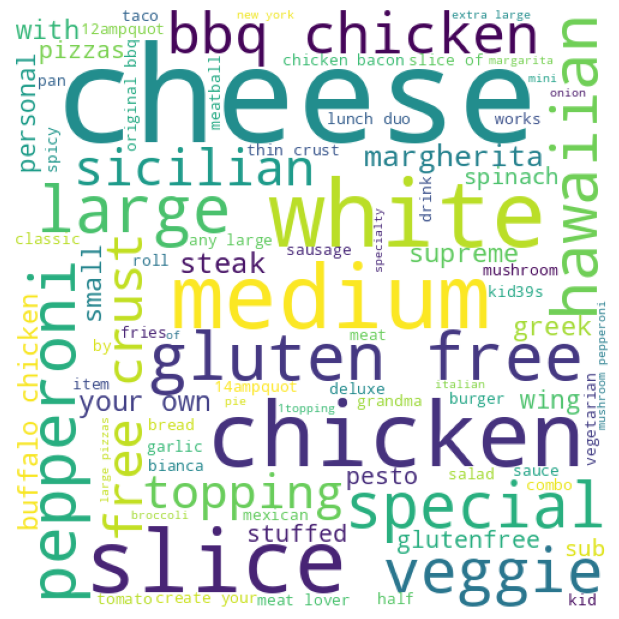

In [243]:
# Python program to generate WordCloud - Common Words surrounding menu items.

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

comment_words = ''
stopwords = set(['and', 'pizza', 'pizzas' 'pizzeria', 'inch', 'the', 'baking', 'required', 'take','n', 'bake'])

# iterate through the csv file
for val in US_Pizza_Cities.menu_item:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 500, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [244]:
#Creating menu_item category to match similiar words.
!pip install fuzzywuzzy python-Levenshtein
from fuzzywuzzy import process

In [246]:
#Extracting most prevalent word in menu_item to see popularity.
def categorize_word(word, choices, threshold=80):
  best_match = process.extractOne(word, choices)
  if best_match[1] >= threshold:
    return best_match[0]
    return word

In [247]:
base_words = ['cheese', 'chicken', 'hawaiian', 'margherita', 'special', 'sicilian', 'gluten', 'veggie', 'white', 'pepperoni', 'buffalo', 'supreme', 'create', 'steak']

In [248]:
US_Pizza_Cities['new_menu_category'] = US_Pizza_Cities['menu_item'].apply(categorize_word, choices=base_words)

In [249]:
#Converting new category field into a cateogry data type.
US_Pizza_Cities['new_menu_category'] = US_Pizza_Cities['new_menu_category'].astype('object')

In [250]:
#Counting prevanlence of new New_Menu_Category
New_Menu_Category_Counts = US_Pizza_Cities.new_menu_category.value_counts(normalize=True)
New_Menu_Category_Counts

cheese        0.240286
chicken       0.226440
white         0.075927
pepperoni     0.075033
special       0.067887
hawaiian      0.062528
veggie        0.062081
margherita    0.043323
sicilian      0.040197
steak         0.029477
gluten        0.029031
supreme       0.027244
create        0.013399
buffalo       0.007146
Name: new_menu_category, dtype: float64

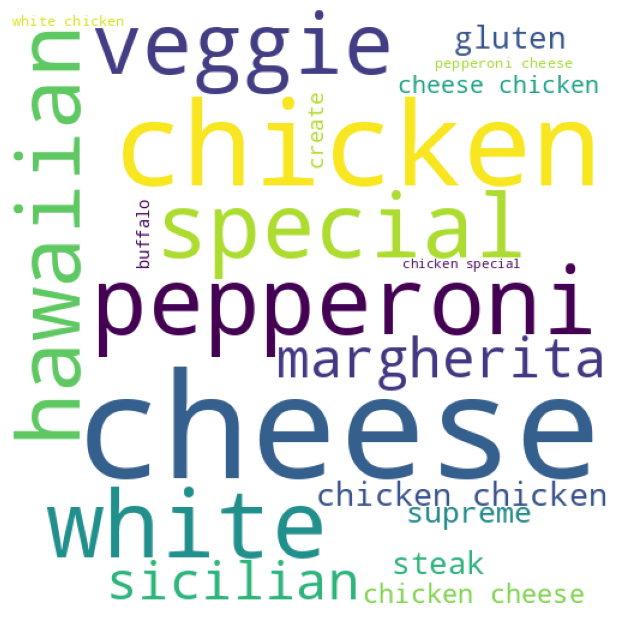

In [251]:
# Python program to generate WordCloud - Common Words surrounding menu items.

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

comment_words = ''
stopwords = set(['none'])

# iterate through the csv file
for val in US_Pizza_Cities.new_menu_category:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 500, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

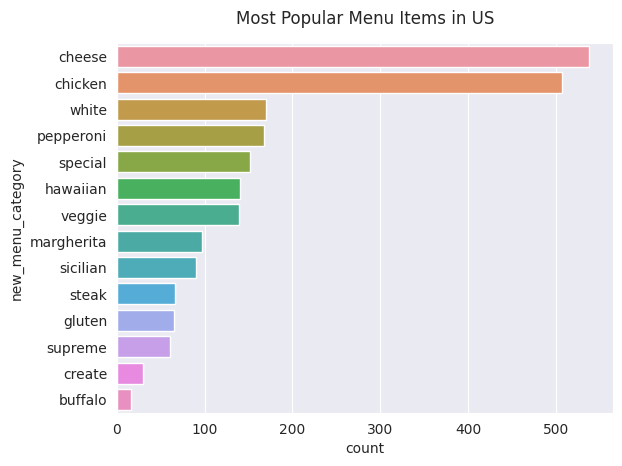

In [252]:
#Countplot of most common menu_item words.
sns.set_style('darkgrid')
menu_cat_fig = sns.countplot(y="new_menu_category", data=US_Pizza_Cities, order= US_Pizza_Cities["new_menu_category"].value_counts().index)
menu_cat_fig.set_title("Most Popular Menu Items in US", y=1.03)
plt.show()

In [253]:
US_Pizza_Cities.head(1)

,address,city,country,latitude,longitude,menus_amountMax,menus_amountMin,menu_item,name,postalCode,...,state_code,total_population,female_population,foreign_born,average_household_size,male_population,median_age,number_of_veterans,state,new_menu_category
0,25 e camelback rd,phoenix,us,33.509266,-112.073044,6.0,6.0,pizza cookie,sauce pizza wine,85012,...,az,1563001,776168.0,300702.0,2.89,786833.0,33.8,72388.0,arizona,None


In [254]:
#Combining similiar white sauce pizza types. SAVE THIS CODE IF NEED TO CREATE GROUPINGS OF ITEMS FOR CO.
#white_sauce = ["bianco", "blanco", "alfredo", "white"]
#CO_Pizza_Cities.loc[CO_Pizza_Cities["new_menu_category"].isin(white_sauce), "new_menu_category"] = "white_sauce"

In [ ]:
#Y Profiler
profile = ProfileReport(US_Pizza_Cities, title="Profiling Report")
profile

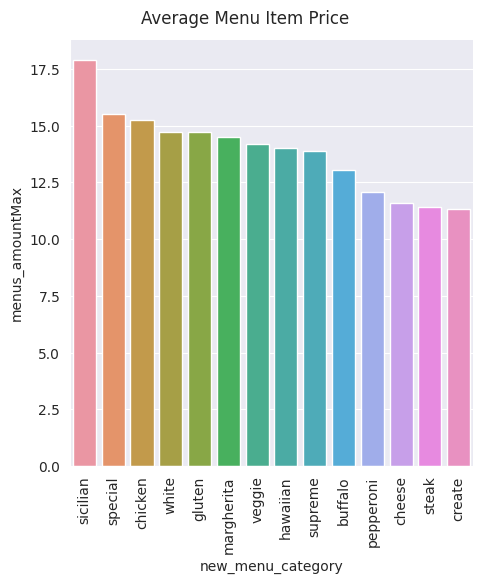

In [256]:
#Average Prices for most popular US Menu item.
sns.set_style('darkgrid')
order = US_Pizza_Cities.groupby('new_menu_category')['menus_amountMax'].mean().sort_values().index
reversed_order= order[::-1]
price = sns.catplot(x="new_menu_category", y="menus_amountMax", data=US_Pizza_Cities, kind="bar", errorbar=None, order=reversed_order)
price.fig.suptitle("Average Menu Item Price", y=1.03)
plt.xticks(rotation=90)
plt.show()

In [257]:
#Looking at Just Colorado
CO_Pizza_Cities = US_Pizza_Cities.loc[US_Pizza_Cities['state_code'] == 'co']

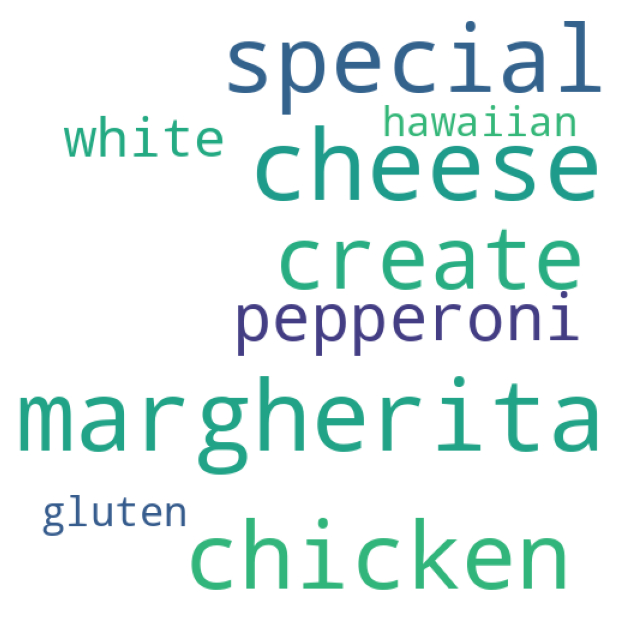

In [258]:
#CO: Common Words surrounding menu items.

comment_words = ''
stopwords = set(['none'])

# iterate through the csv file
for val in CO_Pizza_Cities.new_menu_category:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 500, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

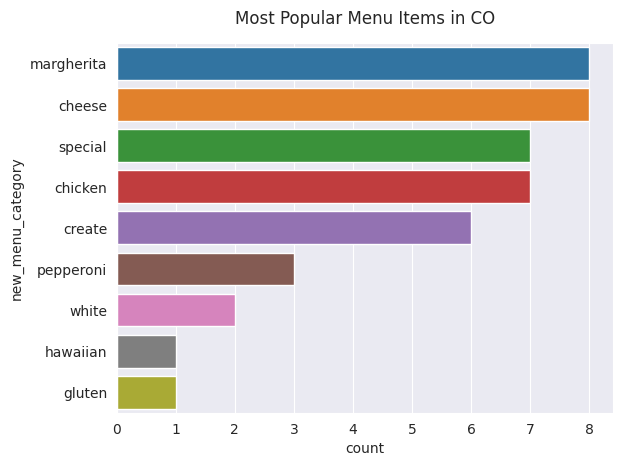

In [259]:
#Countplot of most common menu_item words for CO.
sns.set_style('darkgrid')
menu_cat_fig = sns.countplot(y="new_menu_category", data=CO_Pizza_Cities, order= CO_Pizza_Cities["new_menu_category"].value_counts().index)
menu_cat_fig.set_title("Most Popular Menu Items in CO", y=1.03)
plt.show()

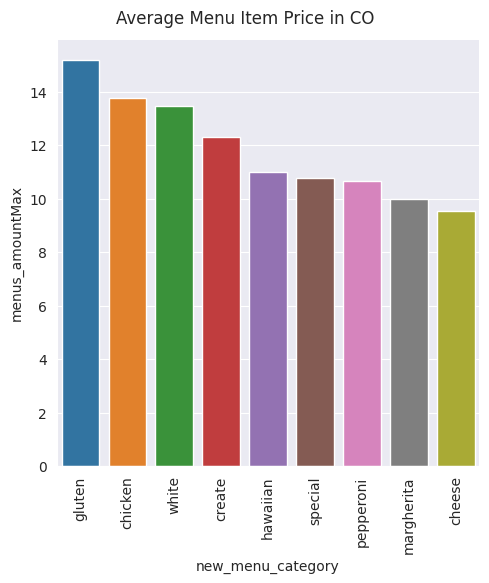

In [260]:
#Average Prices for most popular CO Menu item.
sns.set_style('darkgrid')
order = CO_Pizza_Cities.groupby('new_menu_category')['menus_amountMax'].mean().sort_values().index
reversed_order= order[::-1]
price = sns.catplot(x="new_menu_category", y="menus_amountMax", data=CO_Pizza_Cities, kind="bar", errorbar=None, order=reversed_order)
price.fig.suptitle("Average Menu Item Price in CO", y=1.03)
plt.xticks(rotation=90)
plt.show()

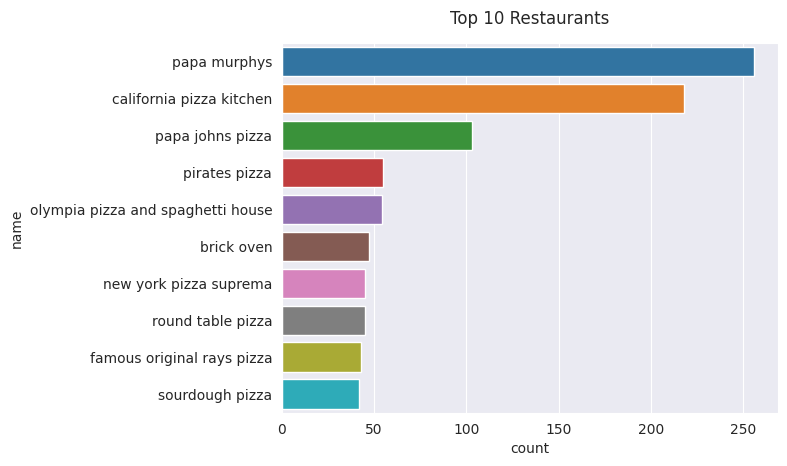

In [261]:
#Countplot of most common restaurants.
top10 = US_Pizza_Cities['name'].value_counts().index[:10]
sns.set_style('darkgrid')
menu_cat_fig = sns.countplot(y="name", data=US_Pizza_Cities, order=top10)
menu_cat_fig.set_title("Top 10 Restaurants", y=1.03)
plt.show()

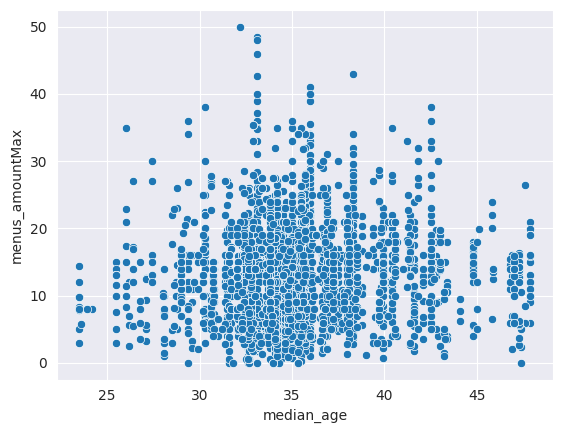

In [262]:
#Median age and menu price comparison.
sns.scatterplot(x='median_age', y='menus_amountMax', data=US_Pizza_Cities)
plt.show()

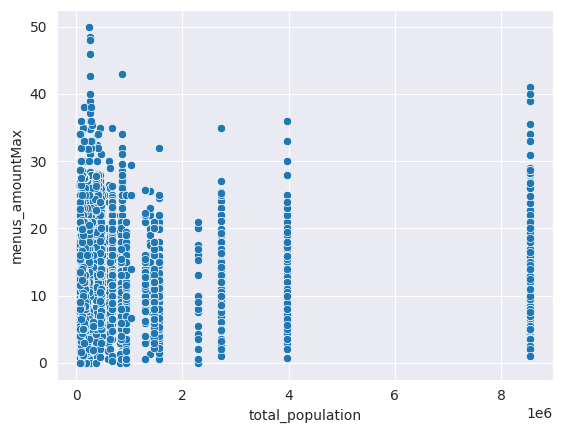

In [263]:
#Total Population and menu price comparison.
sns.scatterplot(x='total_population', y='menus_amountMax', data=US_Pizza_Cities)
plt.show()

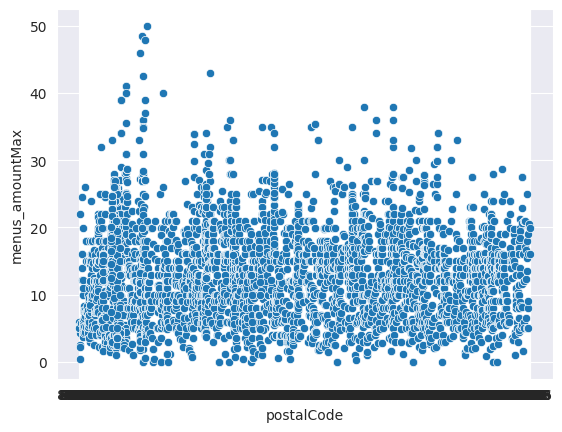

In [264]:
#Postal Code and menu price comparison.
sns.scatterplot(x='postalCode', y='menus_amountMax', data=US_Pizza_Cities)
plt.show()

In [265]:
US_Pizza_Cities['postalCode'] = US_Pizza_Cities['postalCode'].astype(str)
US_Pizza_Cities['postalCode'] = pd.to_numeric(US_Pizza_Cities['postalCode'], errors='coerce')
US_Pizza_Cities['postalCode'] = US_Pizza_Cities['postalCode'].fillna(-1).astype(int)

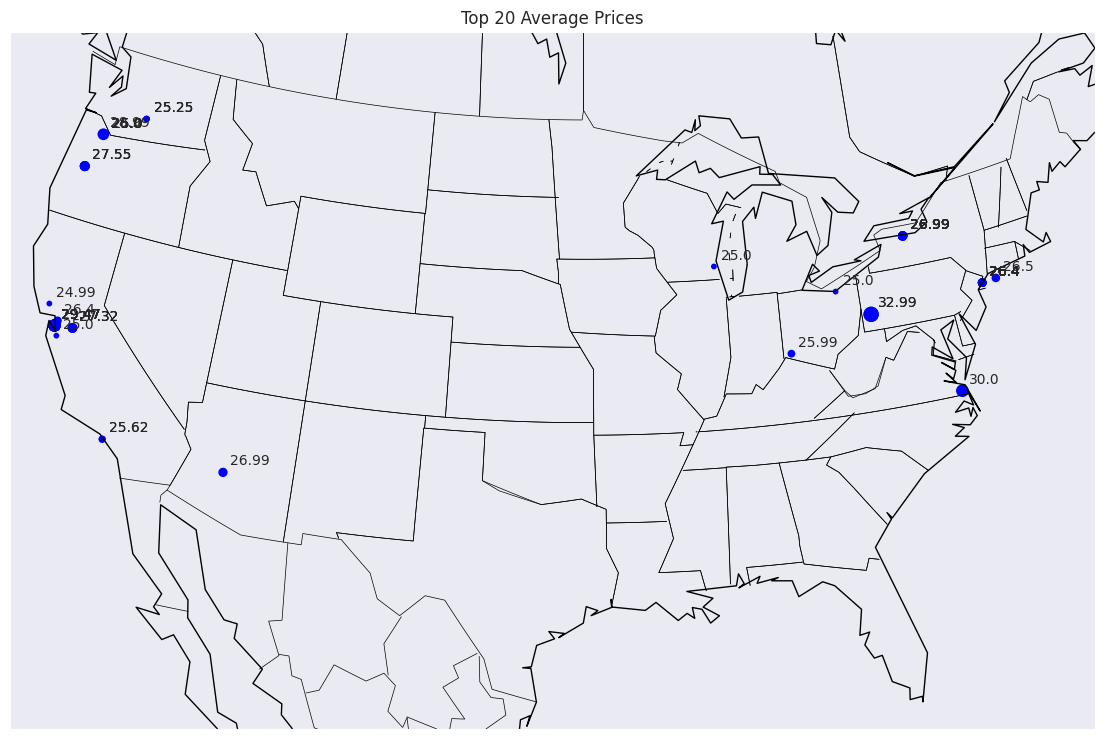

In [266]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install basemap
from mpl_toolkits.basemap import Basemap

# Groupby and aggregate
avg_df = US_Pizza_Cities.groupby('postalCode')['menus_amountMax'].mean().reset_index()

# Filter top 20
top20 = avg_df.nlargest(20, 'menus_amountMax')

# Merge back to regain menus_amountMax column
top20 = pd.merge(US_Pizza_Cities, top20, on='postalCode')

fig = plt.figure(figsize=(14,10))

# Get current axes, and plot on larger size
ax = fig.add_subplot(111)

# Create map
m = Basemap(ax=ax, llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-64, urcrnrlat=49,
            projection='lcc', lat_1=33, lat_2=45, lon_0=-95)

# Draw map
m.drawcoastlines()
m.drawstates()
m.drawcountries()

top20['menus_amountMax'] = top20['menus_amountMax_x']
top20['menus_amountMax'] = top20['menus_amountMax_y']

# Normalize sizes from 10-100
sizes = 10 + 90*(top20['menus_amountMax'] - top20['menus_amountMax'].min())/(top20['menus_amountMax'].max() - top20['menus_amountMax'].min())

# Plot top 20 points
m.scatter(top20['longitude'], top20['latitude'], s=sizes, c='blue',
          latlon=True)

# Convert coordinates for annotation
x, y = m(top20['longitude'].values, top20['latitude'].values)

# Add labels
for i, row in top20.iterrows():
    plt.annotate(str(round(row['menus_amountMax'], 2)), (x[i], y[i]),
                 xytext=(5,5), textcoords='offset points')

# Show plot
plt.title('Top 20 Average Prices')
plt.show()

In [267]:
US_Pizza_Cities.head(5)

,address,city,country,latitude,longitude,menus_amountMax,menus_amountMin,menu_item,name,postalCode,...,state_code,total_population,female_population,foreign_born,average_household_size,male_population,median_age,number_of_veterans,state,new_menu_category
0,25 e camelback rd,phoenix,us,33.509266,-112.073044,6.00,6.00,pizza cookie,sauce pizza wine,85012,...,az,1563001,776168.0,300702.0,2.89,786833.0,33.8,72388.0,arizona,None
1,3414 w union hills dr,phoenix,us,33.654650,-112.132750,5.50,5.50,meatball pizza roll,rays pizza,85027,...,az,1563001,776168.0,300702.0,2.89,786833.0,33.8,72388.0,arizona,None
2,3414 w union hills dr,phoenix,us,33.654650,-112.132750,5.50,5.50,green pepper and onion pizza roll,rays pizza,85027,...,az,1563001,776168.0,300702.0,2.89,786833.0,33.8,72388.0,arizona,None
3,3414 w union hills dr,phoenix,us,33.654650,-112.132750,4.25,4.25,pizza fries with pepperoni or bacon,rays pizza,85027,...,az,1563001,776168.0,300702.0,2.89,786833.0,33.8,72388.0,arizona,pepperoni
4,10720 w indian school rd,phoenix,us,33.495299,-112.290831,21.95,21.95,brothers special sicilian pizza,brothers pizza,85037,...,az,1563001,776168.0,300702.0,2.89,786833.0,33.8,72388.0,arizona,special


In [268]:
#Correlations between all column pairs.
import pandas as pd
from scipy.stats import pearsonr

df = US_Pizza_Cities

num_cols = ['menus_amountMax', 'menus_amountMin', 'priceRangeMin', 'priceRangeMax',
            'total_population', 'female_population', 'foreign_born',
            'average_household_size', 'male_population', 'median_age',
            'number_of_veterans']

corrs = []
for i in range(len(num_cols)):
    for j in range(i+1, len(num_cols)):
        col1 = num_cols[i]
        col2 = num_cols[j]
        r, p = pearsonr(df[col1], df[col2])
        corrs.append((col1, col2, r))

corrs_df = pd.DataFrame(corrs, columns=['Var1', 'Var2', 'Correlation'])
print(corrs_df.sort_values('Correlation', ascending=False))

                      Var1                    Var2  Correlation
34        total_population       female_population     0.999953
37        total_population         male_population     0.999943
42       female_population         male_population     0.999792
40       female_population            foreign_born     0.995233
35        total_population            foreign_born     0.995156
46            foreign_born         male_population     0.994965
19           priceRangeMin           priceRangeMax     0.984825
53         male_population      number_of_veterans     0.962728
39        total_population      number_of_veterans     0.961800
44       female_population      number_of_veterans     0.960856
0          menus_amountMax         menus_amountMin     0.941903
48            foreign_born      number_of_veterans     0.938288
14         menus_amountMin            foreign_born     0.194675
16         menus_amountMin         male_population     0.186274
12         menus_amountMin        total_

In [269]:
# Calculate frequency of each category by city
menu_counts = US_Pizza_Cities.groupby(['city', 'new_menu_category']).size().reset_index(name='count')

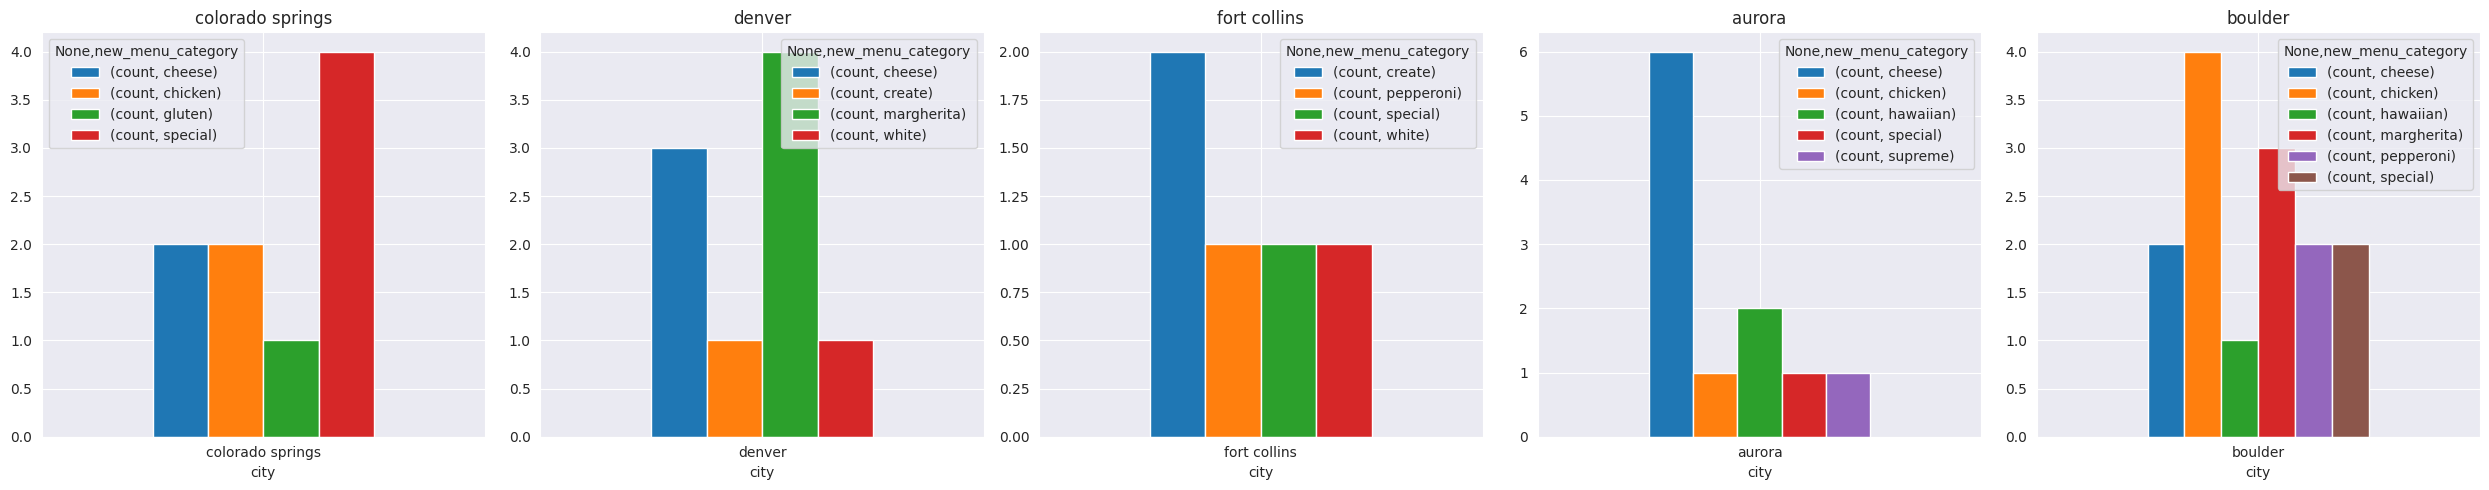

In [270]:
#Create a function to see popular Pizza Menu Items for five cities.
def plot_city_counts(cities):

    num_plots = len(cities)

    # Create figure and axes
    fig, axs = plt.subplots(ncols=num_plots, figsize=(5*num_plots, 5))

    for i, city in enumerate(cities):

        # Filter data
        city_counts = menu_counts[menu_counts['city'] == city]

        # Plot city as bar chart
        city_counts.set_index(['city','new_menu_category']).unstack().plot(kind='bar', ax=axs[i], rot=0)
        axs[i].set_title(city)

    plt.tight_layout()
    plt.show()

# Example
plot_city_counts(['colorado springs', 'denver', 'fort collins', 'aurora', 'boulder'])

In [271]:
#Pivot Data of menu_counts index on city to see which menu item combinations have a correlation.
pivot = menu_counts.pivot(index='city', columns='new_menu_category', values='count')

<Axes: xlabel='new_menu_category', ylabel='new_menu_category'>

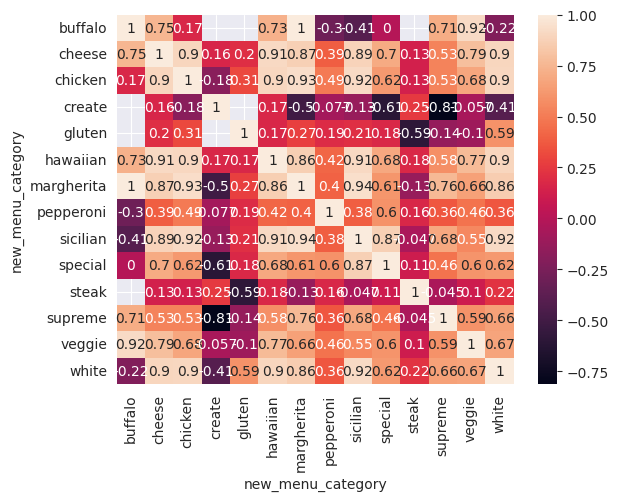

In [272]:
#Heatmap to determine correlations of popular menu item counts grouped by city.
sns.heatmap(pivot.corr(), annot=True)

In [273]:
pivot.corr()

new_menu_category,buffalo,cheese,chicken,create,gluten,hawaiian,margherita,pepperoni,sicilian,special,steak,supreme,veggie,white
new_menu_category,,,,,,,,,,,,,,
buffalo,1.000000,0.747401,0.167162,NaN,NaN,0.729397,1.000000,-0.301511,-0.408248,0.000000,NaN,0.707107,0.916698,-0.221163
cheese,0.747401,1.000000,0.897395,0.163230,0.200112,0.914321,0.869283,0.386287,0.885510,0.697301,0.133921,0.527868,0.791732,0.896169
chicken,0.167162,0.897395,1.000000,-0.184427,0.306137,0.901667,0.930388,0.492666,0.919022,0.622191,0.129790,0.527338,0.679191,0.903586
create,NaN,0.163230,-0.184427,1.000000,NaN,0.165872,-0.502519,-0.076614,-0.132453,-0.612372,0.250000,-0.813489,-0.056888,-0.405554
gluten,NaN,0.200112,0.306137,NaN,1.000000,0.167798,0.270893,0.186733,0.211106,0.177247,-0.592977,-0.136399,-0.101710,0.590283
hawaiian,0.729397,0.914321,0.901667,0.165872,0.167798,1.000000,0.861698,0.415516,0.909428,0.681496,0.175464,0.577685,0.766798,0.897432
margherita,1.000000,0.869283,0.930388,-0.502519,0.270893,0.861698,1.000000,0.400668,0.939794,0.606025,-0.131321,0.759594,0.657066,0.856370
pepperoni,-0.301511,0.386287,0.492666,-0.076614,0.186733,0.415516,0.400668,1.000000,0.384234,0.596010,0.164400,0.355843,0.462169,0.359156
sicilian,-0.408248,0.885510,0.919022,-0.132453,0.211106,0.909428,0.939794,0.384234,1.000000,0.869479,-0.047222,0.683772,0.550420,0.920928


In [274]:
pivot

new_menu_category,buffalo,cheese,chicken,create,gluten,hawaiian,margherita,pepperoni,sicilian,special,steak,supreme,veggie,white
city,,,,,,,,,,,,,,
akron,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alameda,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
albany,1.0,2.0,9.0,NaN,NaN,2.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,5.0
albuquerque,NaN,2.0,3.0,1.0,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,1.0,1.0
alexandria,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wichita,NaN,3.0,2.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
wilmington,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,3.0
winston-salem,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [275]:
#Finding the average price per menu item counts in each city.
mean_price_pivot = df.pivot_table(index='city', columns='new_menu_category', values='menus_amountMax', aggfunc='mean')

In [276]:
mean_price_pivot

new_menu_category,buffalo,cheese,chicken,create,gluten,hawaiian,margherita,pepperoni,sicilian,special,steak,supreme,veggie,white
city,,,,,,,,,,,,,,
akron,7.49,NaN,NaN,NaN,9.990000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alameda,NaN,NaN,NaN,NaN,19.454545,NaN,NaN,NaN,NaN,NaN,NaN,22.0,22.00,NaN
albany,11.99,11.705,12.885556,NaN,NaN,13.99,NaN,NaN,11.00,NaN,12.99,NaN,16.00,11.156000
albuquerque,NaN,5.750,12.983333,9.00,NaN,NaN,8.50,7.25,NaN,NaN,NaN,NaN,15.00,9.250000
alexandria,NaN,NaN,15.990000,NaN,NaN,NaN,NaN,6.99,NaN,NaN,NaN,NaN,NaN,10.240000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wichita,NaN,3.290,9.940000,9.99,NaN,11.99,NaN,NaN,NaN,NaN,NaN,NaN,3.85,NaN
wilmington,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.25,12.49,NaN,NaN,NaN,19.656667
winston-salem,NaN,13.250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='new_menu_category', ylabel='new_menu_category'>

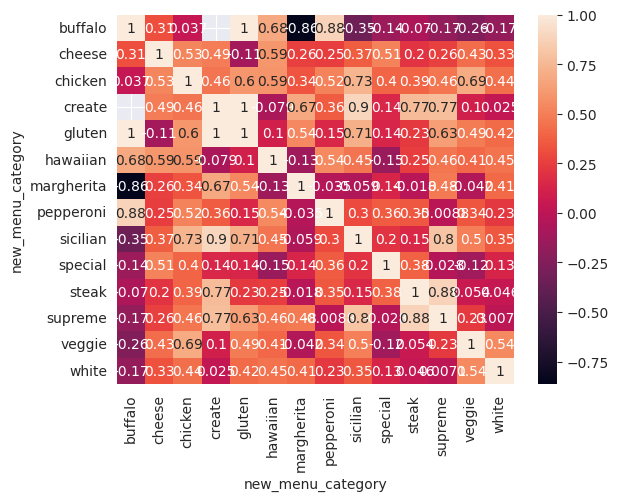

In [277]:
#Heatmap to determine correlations of popular menu item average price grouped by city.
sns.heatmap(mean_price_pivot.corr(), annot=True)

In [278]:
mean_price_pivot.corr()

new_menu_category,buffalo,cheese,chicken,create,gluten,hawaiian,margherita,pepperoni,sicilian,special,steak,supreme,veggie,white
new_menu_category,,,,,,,,,,,,,,
buffalo,1.000000,0.310844,0.036907,NaN,1.000000,0.680138,-0.864517,0.878897,-0.346612,-0.140611,-0.069881,-0.174771,-0.258466,-0.169054
cheese,0.310844,1.000000,0.529878,0.492893,-0.105375,0.592890,0.255673,0.246937,0.372787,0.512767,0.199393,0.262290,0.425354,0.327850
chicken,0.036907,0.529878,1.000000,0.457387,0.595719,0.585492,0.336965,0.517641,0.731877,0.395189,0.389129,0.464786,0.693239,0.438750
create,NaN,0.492893,0.457387,1.000000,1.000000,-0.078937,0.672804,0.363390,0.896219,0.140719,0.773600,0.774866,0.103698,0.025148
gluten,1.000000,-0.105375,0.595719,1.000000,1.000000,0.103222,0.536155,0.154568,0.711546,0.140185,0.234952,0.630890,0.485351,0.418217
hawaiian,0.680138,0.592890,0.585492,-0.078937,0.103222,1.000000,-0.134186,0.544471,0.454453,-0.148559,0.245697,0.463901,0.408741,0.451577
margherita,-0.864517,0.255673,0.336965,0.672804,0.536155,-0.134186,1.000000,-0.034783,-0.058723,0.139206,-0.017712,0.476096,-0.042172,0.414034
pepperoni,0.878897,0.246937,0.517641,0.363390,0.154568,0.544471,-0.034783,1.000000,0.295849,0.359430,0.347385,-0.008816,0.339879,0.225664
sicilian,-0.346612,0.372787,0.731877,0.896219,0.711546,0.454453,-0.058723,0.295849,1.000000,0.204477,0.153086,0.804393,0.499548,0.349171


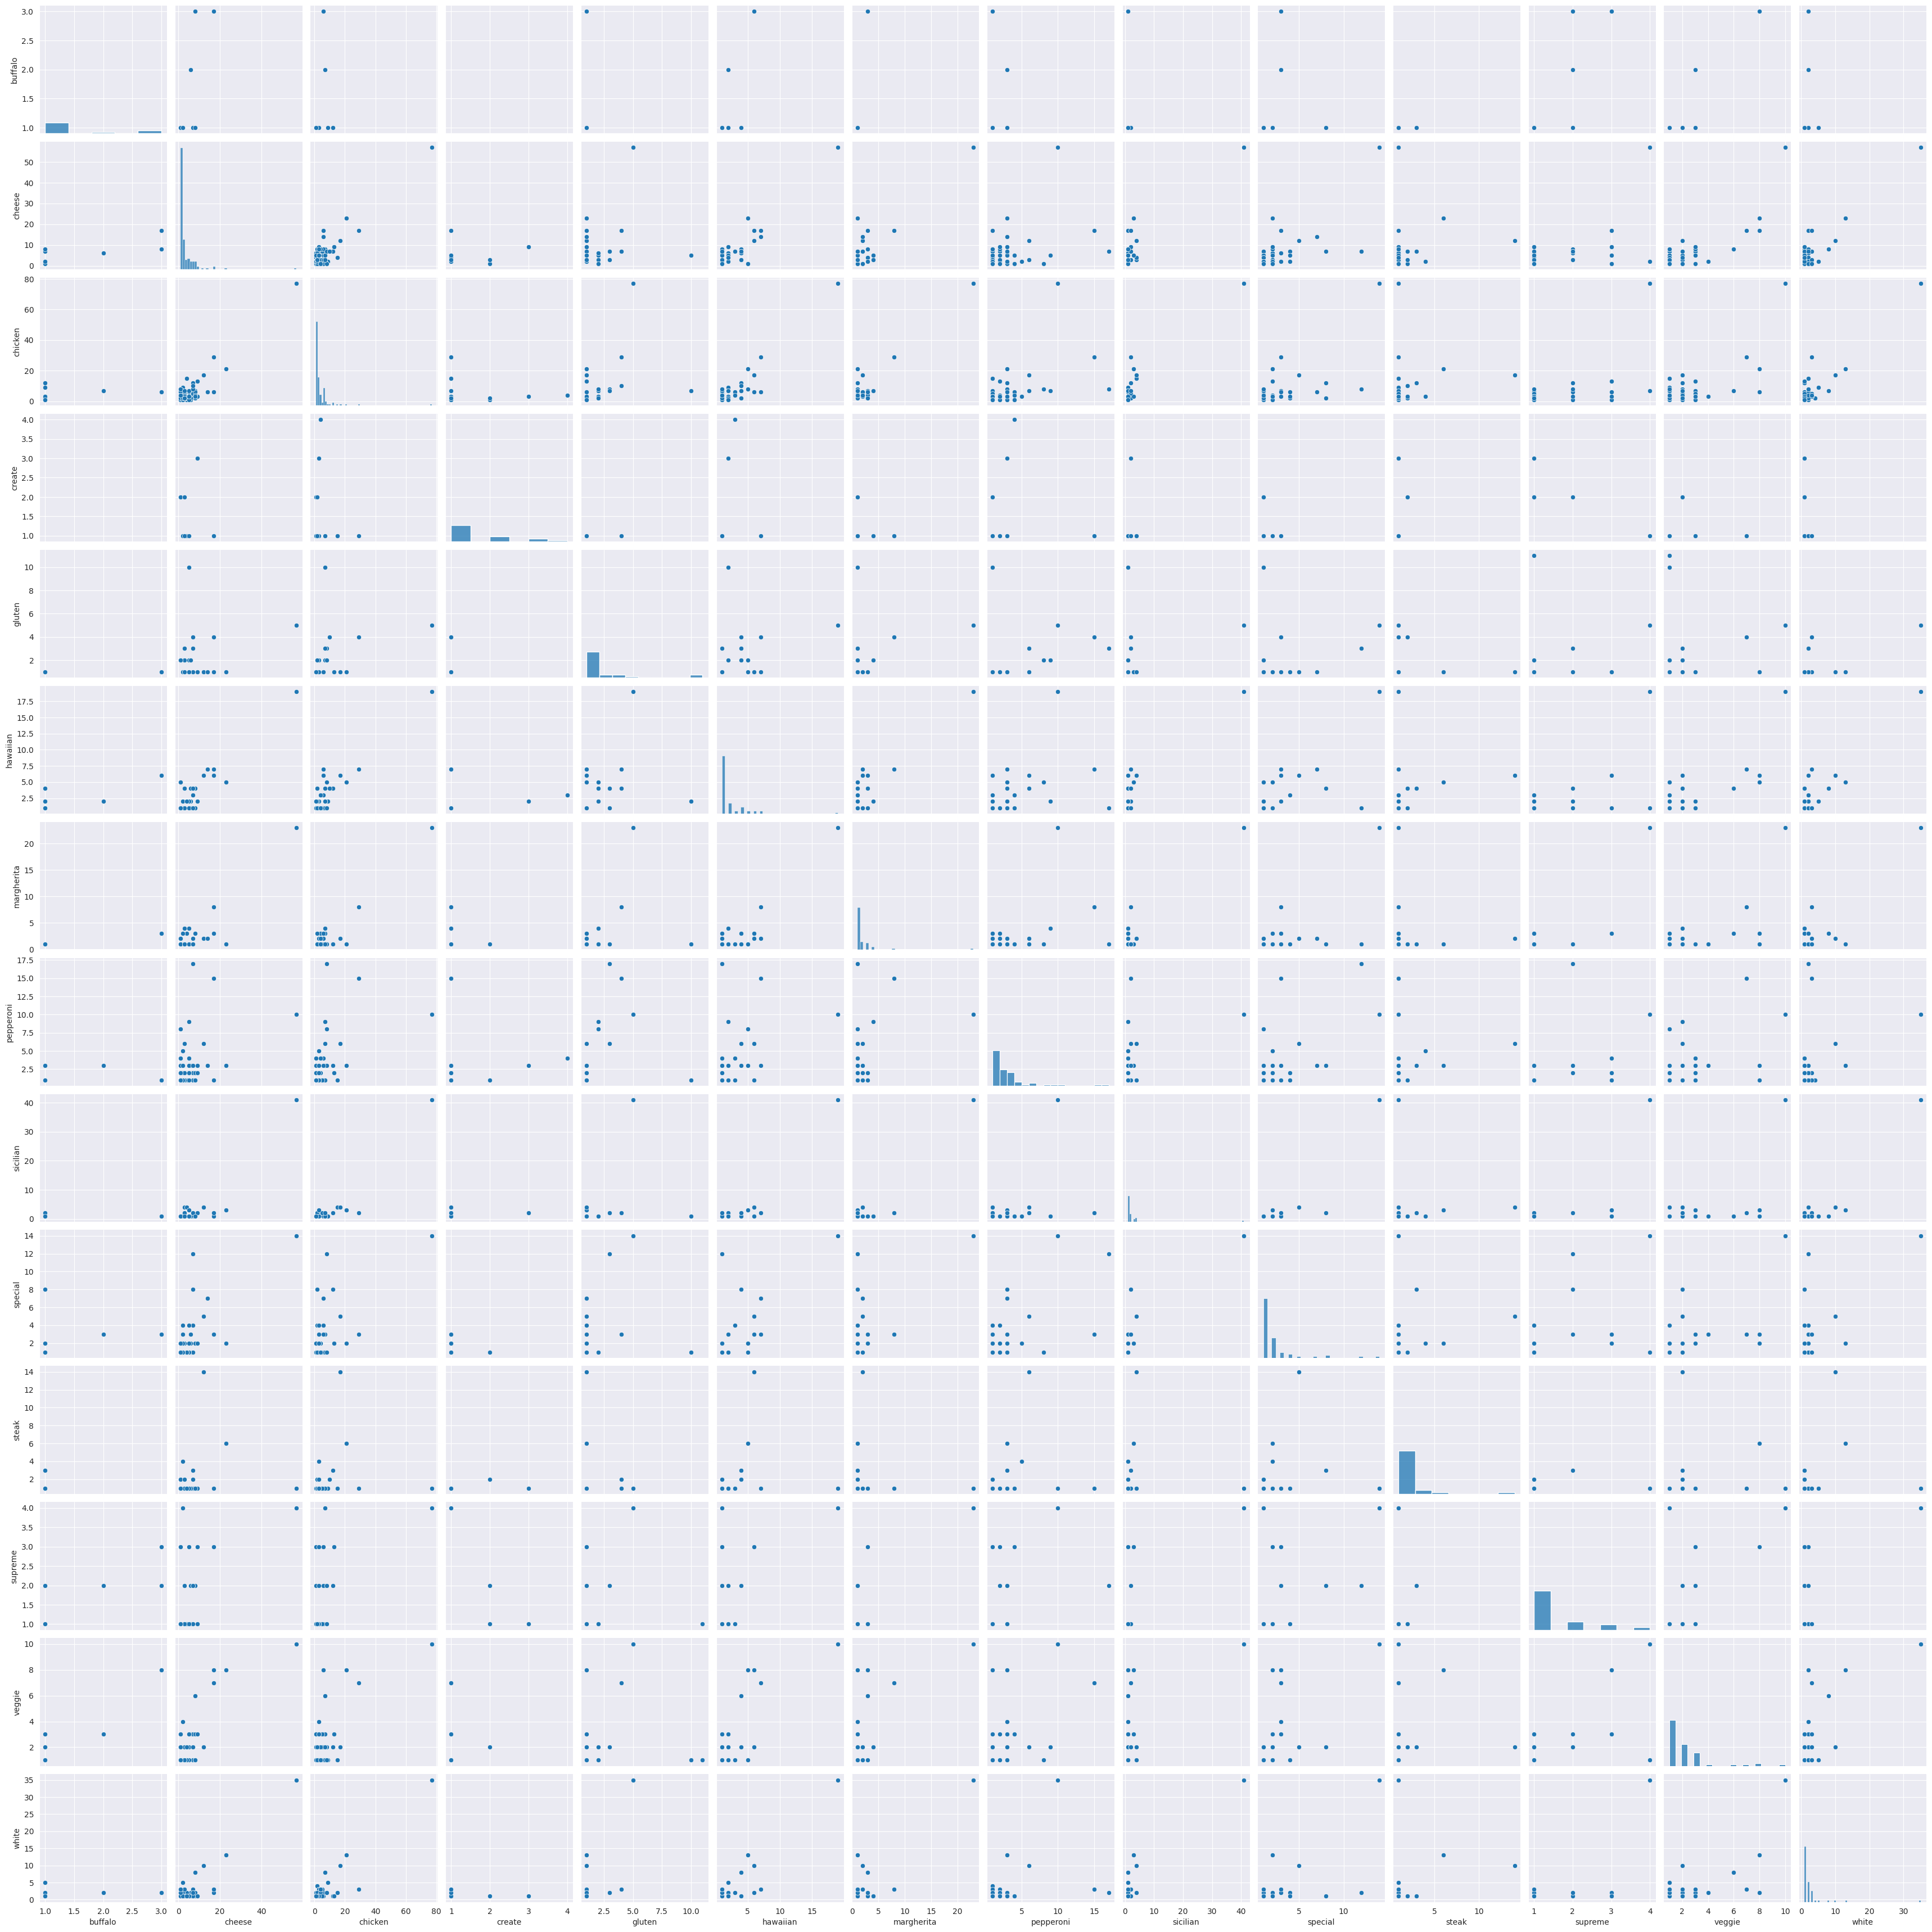

In [118]:
sns.pairplot(pivot)

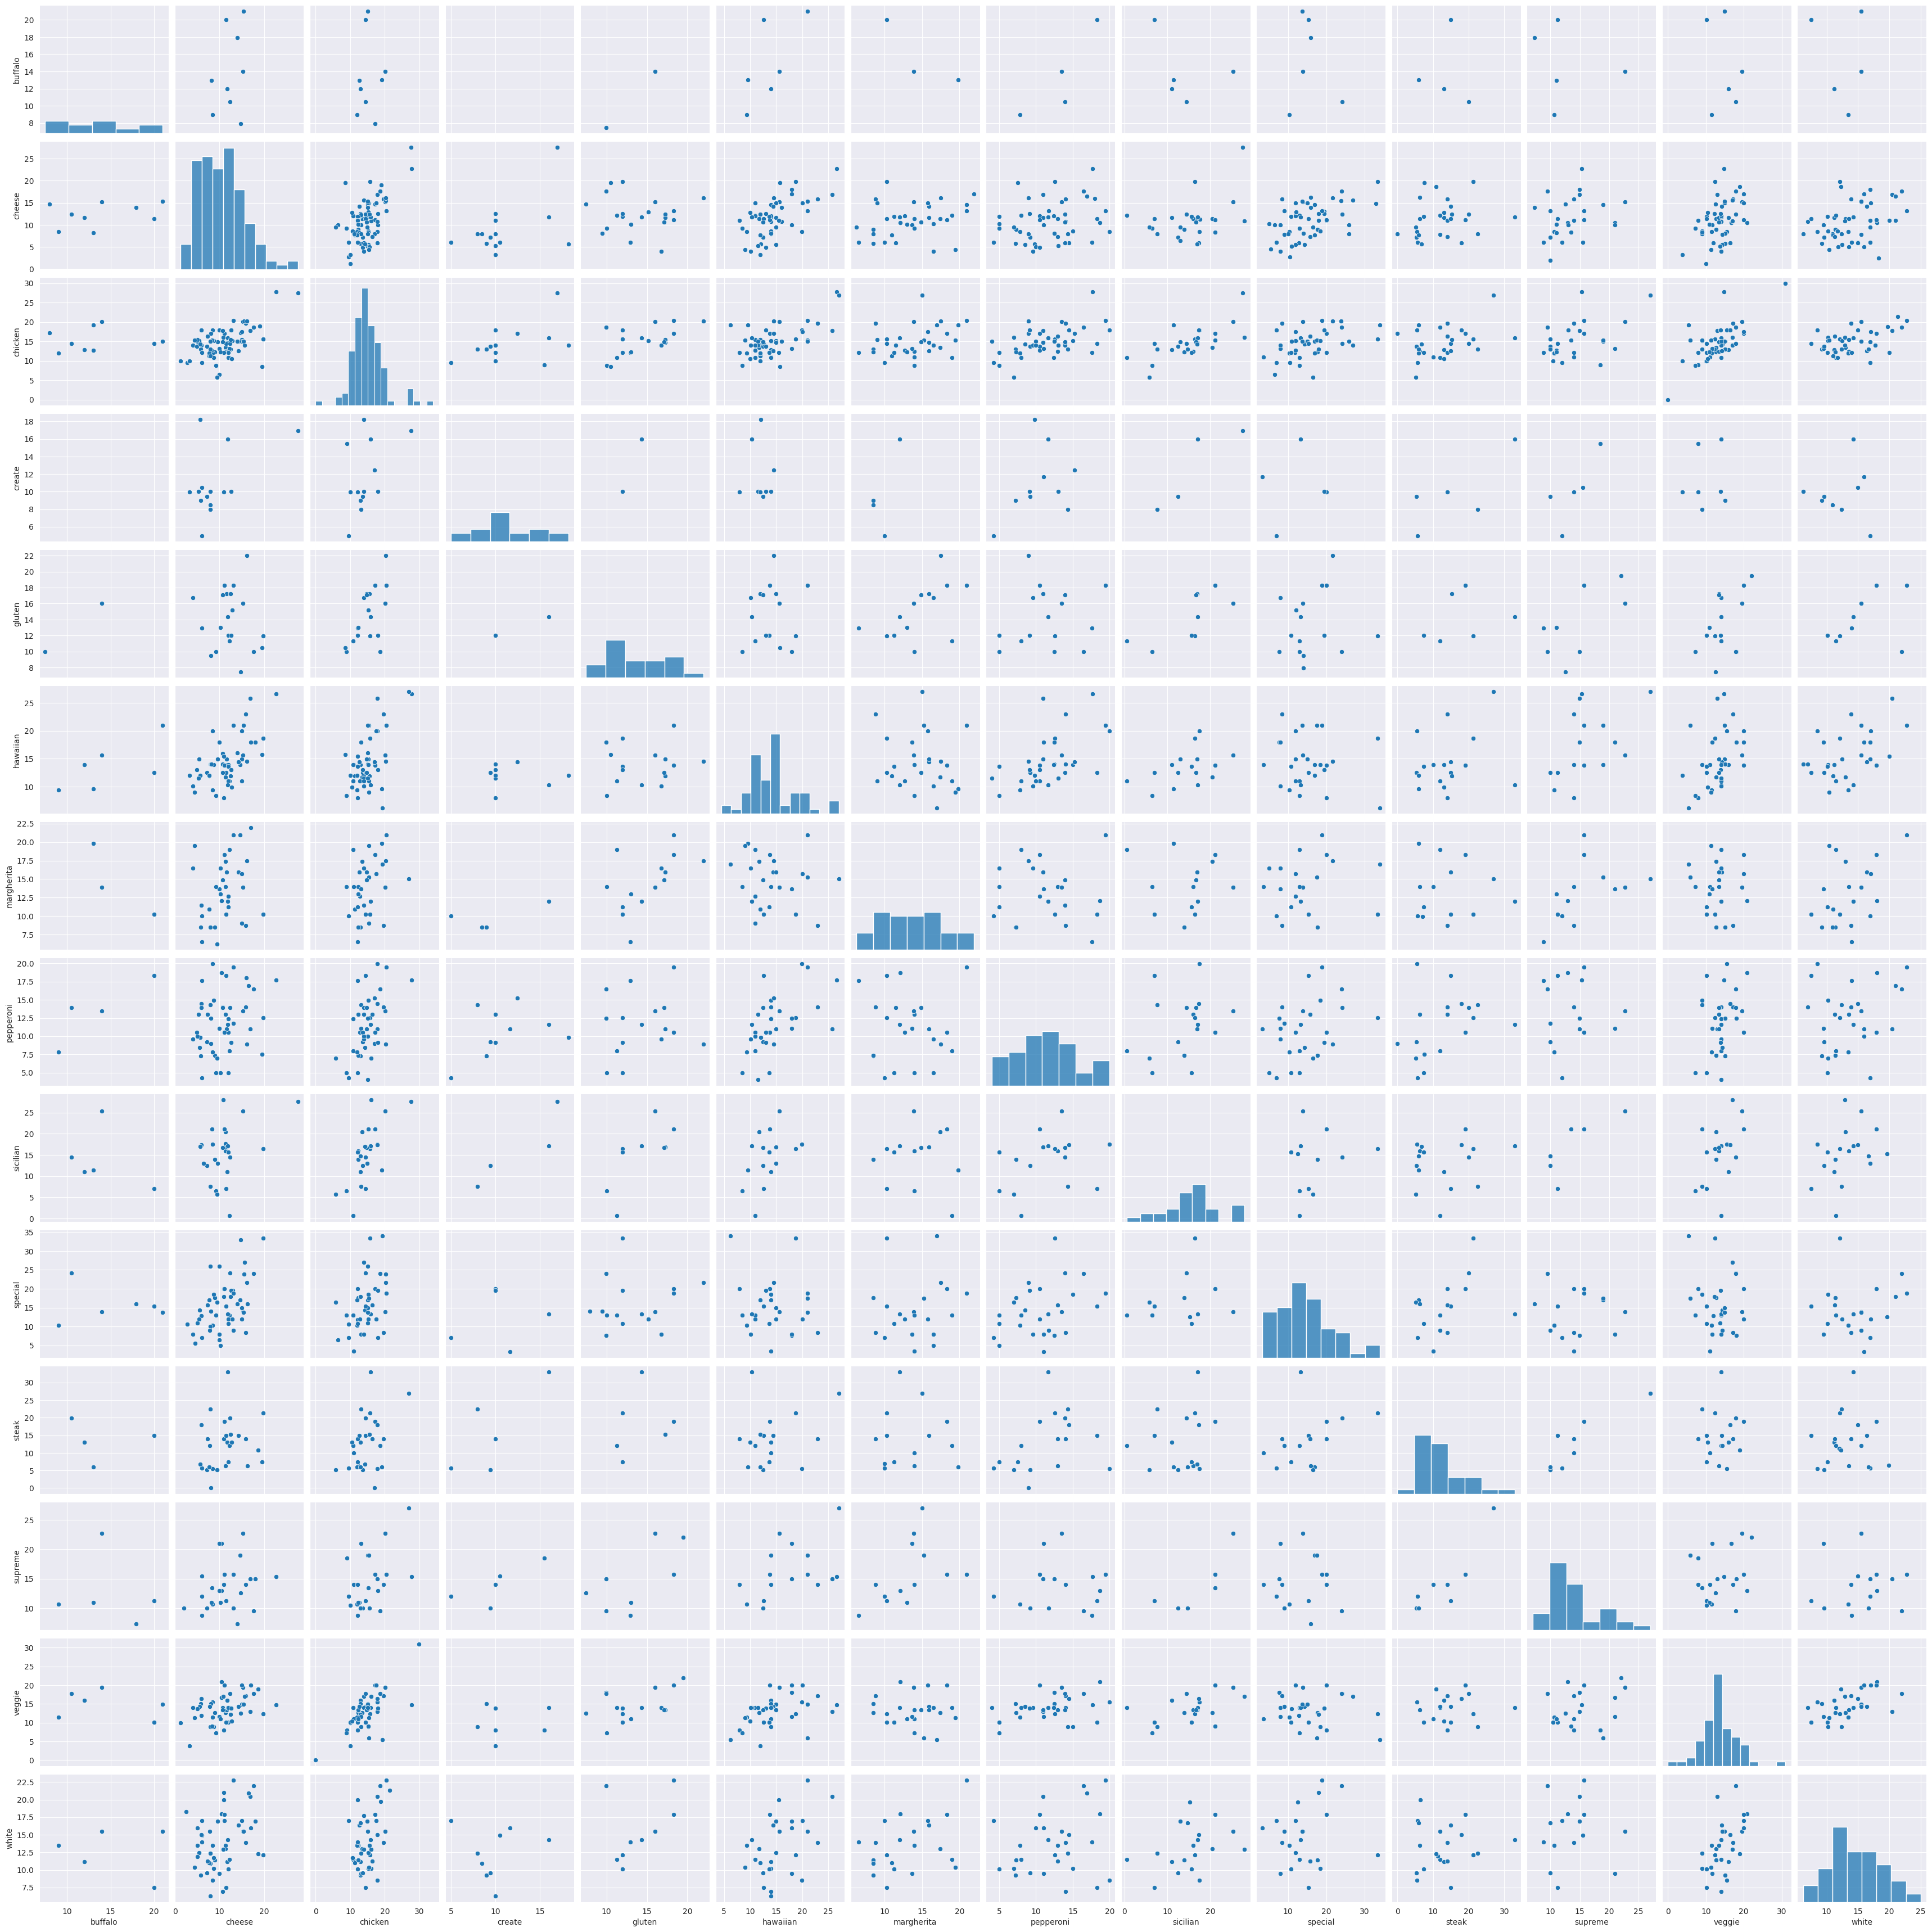

In [83]:
sns.pairplot(mean_price_pivot)

In [279]:
#Would like to see correlation between restaurants and menu items.
menu_counts_restaurant = US_Pizza_Cities.groupby(['name', 'new_menu_category']).size().reset_index(name='count')

In [280]:
restaurant_pivot = menu_counts_restaurant.pivot(index='name', columns='new_menu_category', values='count')

In [282]:
restaurant_pivot.corr()

new_menu_category,buffalo,cheese,chicken,create,gluten,hawaiian,margherita,pepperoni,sicilian,special,steak,supreme,veggie,white
new_menu_category,,,,,,,,,,,,,,
buffalo,1.000000,0.100504,0.176048,NaN,NaN,NaN,NaN,NaN,NaN,-5.000000e-01,NaN,NaN,NaN,NaN
cheese,0.100504,1.000000,0.838326,0.418770,5.627668e-01,0.689641,0.940173,0.939286,0.598984,3.205351e-01,0.491362,0.163758,0.833019,0.232882
chicken,0.176048,0.838326,1.000000,0.953491,6.517995e-01,0.868233,0.976285,0.950962,0.527967,7.948733e-02,0.391464,0.159514,0.881909,0.168271
create,NaN,0.418770,0.953491,1.000000,NaN,0.984613,NaN,0.971048,NaN,NaN,NaN,1.000000,0.748753,NaN
gluten,NaN,0.562767,0.651799,NaN,1.000000e+00,0.518103,0.990039,0.377150,0.354459,5.362887e-17,0.500000,-0.322749,0.312396,-0.500000
hawaiian,NaN,0.689641,0.868233,0.984613,5.181026e-01,1.000000,0.989303,0.865849,0.731399,3.182780e-01,0.733333,-0.161165,0.775136,-0.071429
margherita,NaN,0.940173,0.976285,NaN,9.900393e-01,0.989303,1.000000,0.999691,0.536576,4.046107e-01,NaN,NaN,0.967155,-0.151330
pepperoni,NaN,0.939286,0.950962,0.971048,3.771496e-01,0.865849,0.999691,1.000000,0.937937,5.829708e-01,1.000000,0.266076,0.950807,-0.149071
sicilian,NaN,0.598984,0.527967,NaN,3.544588e-01,0.731399,0.536576,0.937937,1.000000,2.566263e-02,-0.166667,1.000000,0.548391,0.473476


<Axes: xlabel='new_menu_category', ylabel='new_menu_category'>

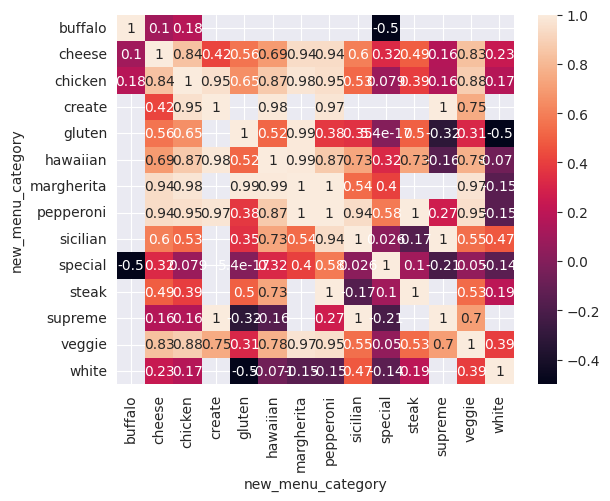

In [281]:
sns.heatmap(restaurant_pivot.corr(), annot=True)

**EDA Conclusion:** I created a new column called new_menu_category that took the most common words used in the menu to assign a category to each observation for menu items. I see a lot of relationships between new_menu_category grouped by city and grouped by restaurant. Also see relationships pertaining to price grouped by city. Between these three I feel confident that I can recommend which menu items to offer based on a city or even restaurant and then price points of those menu items which does answer the original questions.